In [28]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
web_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
# Find the table in the HTML
table = web_soup.find('table')

# Find all rows in the table
rows = table.find_all('tr')

# Create a list to store the data
data = []

for row in rows:
    # Find all columns in each row
    cols = row.find_all('td')
    
    # Get the text from each column
    cols = [col.text for col in cols]
    
    # Add the columns to the data list
    data.append(cols)

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all columns in each row
    cols = row.find_all('td')
    
    # Get the text from each column
    cols = [col.text for col in cols]
    
    # Add the columns to the data list
    data.append(cols)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=column_names)

In [8]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Print the data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Drop rows with None values
df.dropna(inplace=True)

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'id' to object (string)
df['id'] = df['id'].astype(str)

# Convert 'sol', 'ls', 'month' to int64
for col in ['sol', 'ls', 'month']:
    df[col] = df[col].astype('int64')

# Convert 'min_temp', 'pressure' to float
for col in ['min_temp', 'pressure']:
    df[col] = df[col].astype(float)



In [14]:
# Print the data type of each column
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [15]:
# 1. How many months are there on Mars?
# Group by 'month' and get the size of each group
month_counts = df.groupby('month').size()

# Print the result
print(month_counts)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64


In [17]:
# 2. How many Martian days' worth of data are there?
# Get the number of Martian days' worth of data
num_days = df.shape[0]

# Print the result
print(num_days)


1867


In [18]:
# 3. What is the average low temperature by month?
# Group by 'month' and calculate the mean of 'min_temp'
avg_low_temp = df.groupby('month')['min_temp'].mean()

# Print the result
print(avg_low_temp)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Temperature by Month'}, xlabel='month'>

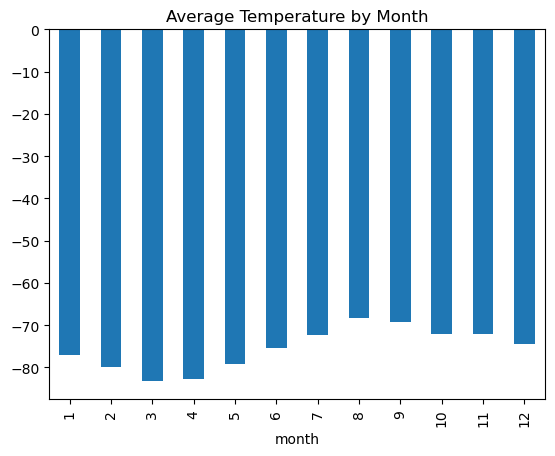

In [19]:
# Plot the average temperature by month
# Group by 'month' and calculate the mean of 'min_temp'
avg_temp = df.groupby('month')['min_temp'].mean()

# Plot the result
avg_temp.plot(kind='bar', title='Average Temperature by Month')


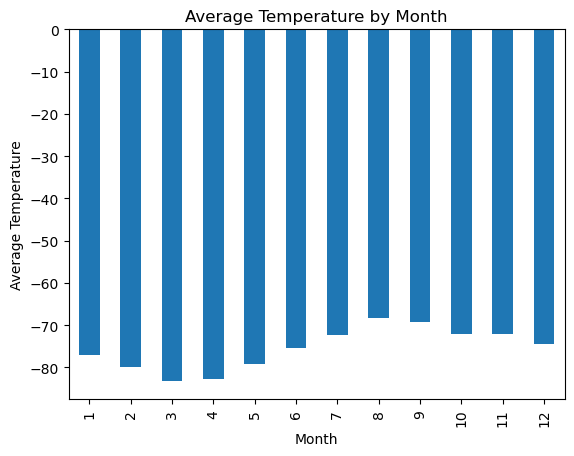

In [22]:
# Calculate the average temperature for each month
avg_temp = df.groupby('month')['min_temp'].mean()

# Plot the result
avg_temp.plot(kind='bar', title='Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()




In [24]:
# 4. Average pressure by Martian month
# Group by 'month' and calculate the mean of 'pressure'
avg_pressure = df.groupby('month')['pressure'].mean()

# Print the result
print(avg_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


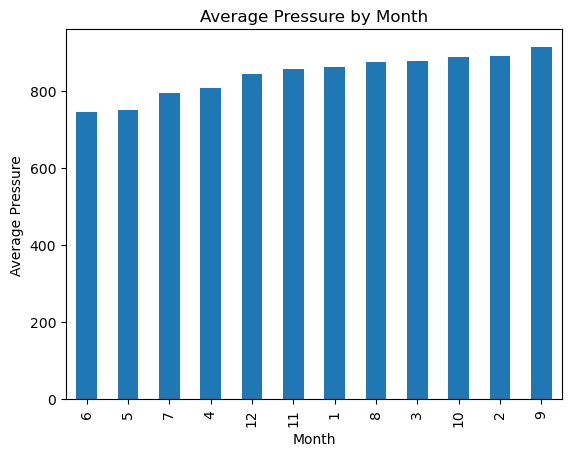

In [26]:
# Plot the average pressure by month
# Sort the average pressures
sorted_avg_pressure = avg_pressure.sort_values()

# Plot the result
sorted_avg_pressure.plot(kind='bar', title='Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()



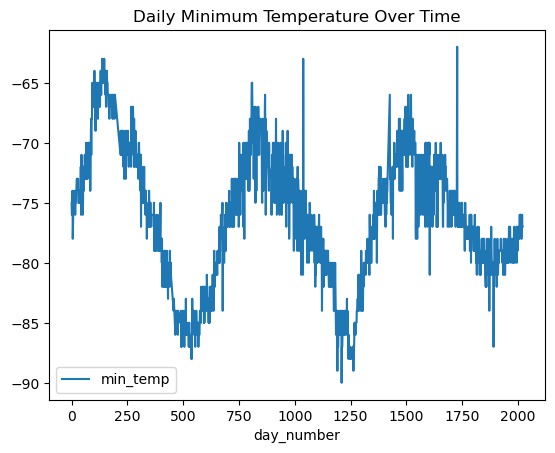

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['day_number'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days
# Create a plot of 'min_temp' over 'day_number'
df.plot(x='day_number', y='min_temp', title='Daily Minimum Temperature Over Time')
plt.show()